In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf


In [47]:
file = './properties_data.csv'

data = pd.read_csv(file)

data.head(5)

,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,...,False,False,True,False,False,False,False,False,True,False
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,...,False,False,True,True,False,False,False,False,True,False
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,...,False,True,True,True,False,False,False,True,True,True
3,6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,...,False,False,False,False,False,False,False,False,False,False
4,6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,...,False,True,True,True,True,False,False,True,True,False


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1905 non-null   int64  
 1   neighborhood         1905 non-null   object 
 2   latitude             1905 non-null   float64
 3   longitude            1905 non-null   float64
 4   price                1905 non-null   int64  
 5   size_in_sqft         1905 non-null   int64  
 6   price_per_sqft       1905 non-null   float64
 7   no_of_bedrooms       1905 non-null   int64  
 8   no_of_bathrooms      1905 non-null   int64  
 9   quality              1905 non-null   object 
 10  maid_room            1905 non-null   bool   
 11  unfurnished          1905 non-null   bool   
 12  balcony              1905 non-null   bool   
 13  barbecue_area        1905 non-null   bool   
 14  built_in_wardrobes   1905 non-null   bool   
 15  central_ac           1905 non-null   b

In [8]:
data.describe().round(2)

,id,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms
count,1905.00,1905.00,1905.00,1905.00,1905.00,1905.00,1905.00,1905.00
mean,7573308.19,25.12,55.21,2085829.87,1417.05,1327.24,1.79,2.51
std,192525.17,0.06,0.07,2913199.96,891.49,668.47,0.95,1.06
min,5528049.00,24.87,55.07,220000.00,294.00,361.87,0.00,1.00
25%,7560167.00,25.07,55.15,890000.00,840.00,870.92,1.00,2.00
50%,7631829.00,25.10,55.21,1400000.00,1271.00,1169.59,2.00,2.00
75%,7670328.00,25.19,55.27,2200000.00,1703.00,1622.50,2.00,3.00
max,7706643.00,25.27,55.44,35000000.00,9576.00,4805.87,5.00,6.00


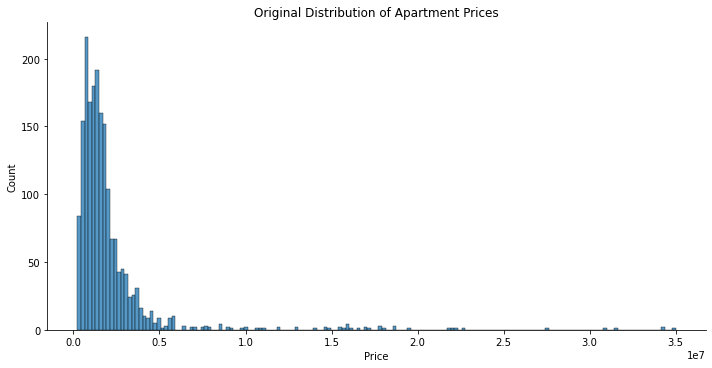

In [49]:
 # developing a histogram using DISPLOT
sns.displot(data   = data,
            x      = 'price',
            height = 5,
            aspect = 2)



plt.title(label   = "Original Distribution of Apartment Prices")
plt.xlabel(xlabel = "Price") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [50]:
data['log_price'] = np.log10(data['price'])

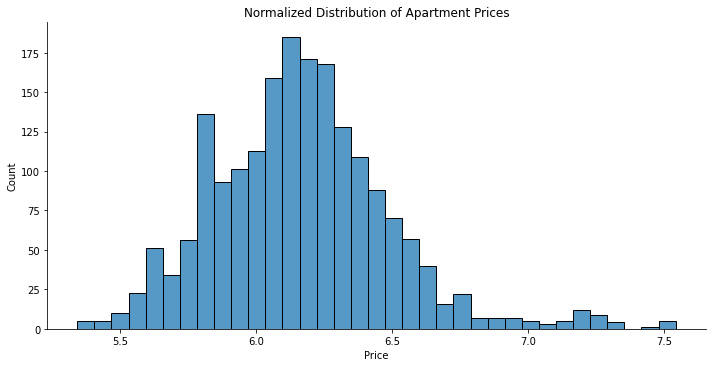

In [51]:
 # developing a histogram using DISPLOT
sns.displot(data   = data,
            x      = 'log_price',
            height = 5,
            aspect = 2)



plt.title(label   = "Normalized Distribution of Apartment Prices")
plt.xlabel(xlabel = "Price") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

**CONTINUOUS FEATURES**
latitude             
longitude             
price
size_in_sqft	
price_per_sqft

**INTERVAL OR COUNTS**
no_of_bedrooms
no_of_bathrooms

In [52]:
# creating a list of continuous features 
continuous_data = ['latitude',             
                    'longitude',             
                    'price',
                    'size_in_sqft',	
                    'price_per_sqft']


# developing a correlation matrix based on continuous features
data_corr = data[continuous_data].corr(method = 'pearson')


# filtering the results to only show correlations with price
data_corr.loc[ : , 'price'].round(decimals = 2).sort_values(ascending = False)

price             1.00
size_in_sqft      0.81
price_per_sqft    0.71
latitude          0.21
longitude        -0.02
Name: price, dtype: float64

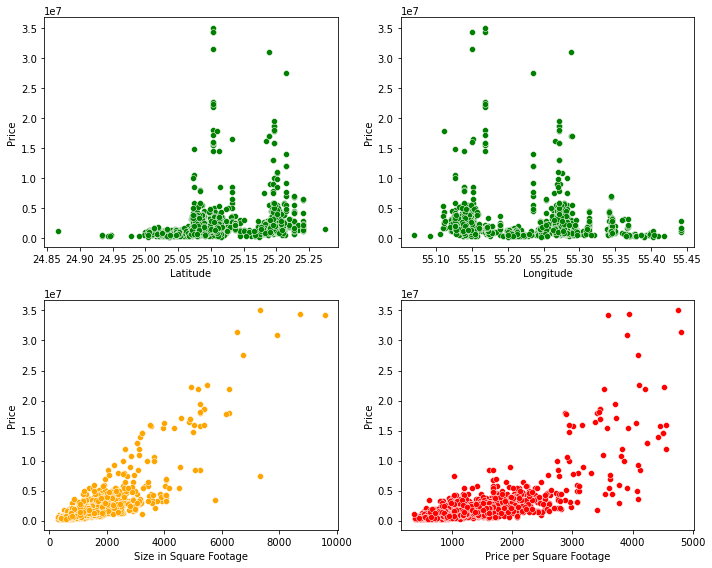

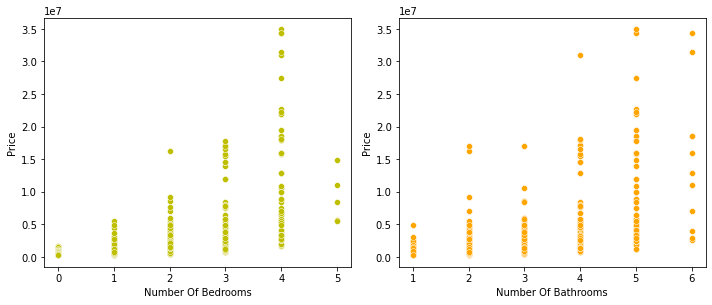

In [14]:
########################
# Visual EDA (Scatterplots)
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = data['latitude'],
                y = data['price'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Latitude')
plt.ylabel(ylabel = 'Price')


########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = data['longitude'],
                y = data['price'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Longitude')
plt.ylabel(ylabel = 'Price')


########################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = data['size_in_sqft'],
                y = data['price'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'Size in Square Footage')
plt.ylabel(ylabel = 'Price')


########################


# developing a scatterplot
plt.subplot(2, 2 , 4)
sns.scatterplot(x = data['price_per_sqft'],
                y = data['price'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'Price per Square Footage')
plt.ylabel(ylabel = 'Price')


# cleaning up the layout and displaying the results
plt.tight_layout()

plt.show()


########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))


# developing a scatterplot
plt.subplot(3, 2, 1)
sns.scatterplot(x = data['no_of_bedrooms'],
                y = data['price'],
                color = 'y')


# adding labels but not adding title
plt.xlabel(xlabel = 'Number Of Bedrooms')
plt.ylabel(ylabel = 'Price')


########################


# developing a scatterplot
plt.subplot(3, 2, 2)
sns.scatterplot(x = data['no_of_bathrooms'],
                y = data['price'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'Number Of Bathrooms')
plt.ylabel(ylabel = 'Price')


########################

# cleaning up the layout and displaying the results
plt.tight_layout()
plt.show()




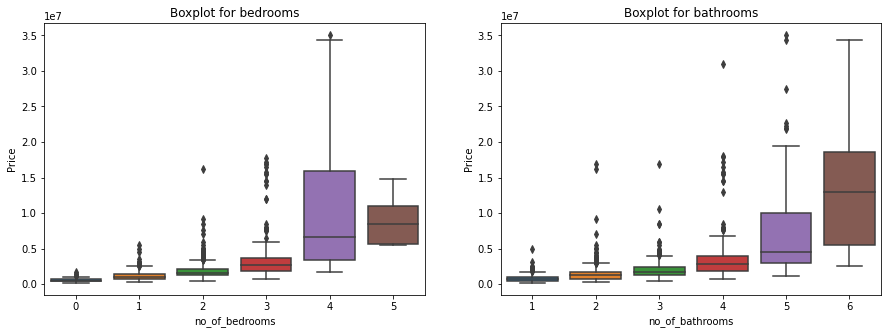

In [22]:
plt.subplots(figsize =(15,5))
plt.subplot(1,2,1)
# developing a boxplot
sns.boxplot(x    = 'no_of_bedrooms',
            y    = 'price',
            data = data)


# titles and axis labels
plt.title(label   = 'Boxplot for bedrooms')
plt.xlabel(xlabel = 'no_of_bedrooms')
plt.ylabel(ylabel = 'Price')


plt.subplot(1,2,2)
# developing a boxplot
sns.boxplot(x    = 'no_of_bathrooms',
            y    = 'price',
            data = data)


# titles and axis labels
plt.title(label   = 'Boxplot for bathrooms')
plt.xlabel(xlabel = 'no_of_bathrooms')
plt.ylabel(ylabel = 'Price')


# displaying the plot
plt.show()


In [53]:
for index, value in data.iterrows():
      if data.loc[index, 'no_of_bedrooms'] == 0:
        data.loc[index, 'no_of_bedrooms'] = 0.1
data['no_of_bedrooms']

0       1.0
1       2.0
2       3.0
3       2.0
4       0.1
       ... 
1900    2.0
1901    1.0
1902    3.0
1903    1.0
1904    1.0
Name: no_of_bedrooms, Length: 1905, dtype: float64

In [ ]:

data['log_no_of_bedrooms'] = np.log10(data['no_of_bedrooms'])
data['log_no_of_bathrooms'] = np.log10(data['no_of_bathrooms'])

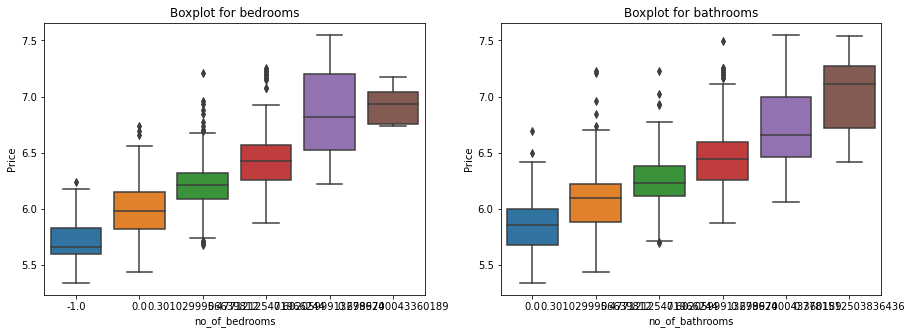

In [56]:
plt.subplots(figsize =(15,5))
plt.subplot(1,2,1)
# developing a boxplot
sns.boxplot(x    = 'log_no_of_bedrooms',
            y    = 'log_price',
            data = data)


# titles and axis labels
plt.title(label   = 'Boxplot for bedrooms')
plt.xlabel(xlabel = 'no_of_bedrooms')
plt.ylabel(ylabel = 'Price')


plt.subplot(1,2,2)
# developing a boxplot
sns.boxplot(x    = 'log_no_of_bathrooms',
            y    = 'log_price',
            data = data)


# titles and axis labels
plt.title(label   = 'Boxplot for bathrooms')
plt.xlabel(xlabel = 'no_of_bathrooms')
plt.ylabel(ylabel = 'Price')


# displaying the plot
plt.show()
